In [1]:
import cv2 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("connect.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [3]:
pos = (47,68)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
Xprev = np.zeros_like(img_bin)
Xprev[pos[1],pos[0]]=255
Xcurrent = cv2.bitwise_and(cv2.dilate(Xprev,kernel),img_bin)
while(not (Xprev==Xcurrent).all()):
    Xprev = Xcurrent
    Xcurrent = cv2.bitwise_and(cv2.dilate(Xprev,kernel),img_bin)

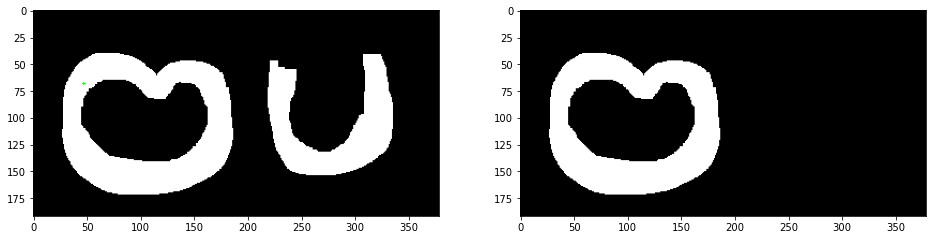

In [4]:
plt.figure(figsize=(16,16))
cv2.circle(img,pos,1,(0,255,0),-1)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(Xcurrent,cmap='gray')